Indian Government has undertaken many research studies to analyze the impact of global warming and climate change on rainfall pattern in India. The analyses were made using observed rainfall data from more than 3000 rain-gauge stations spread over the country for 115 years (1901-2015). The major inferences from these studies based on the 115 years of rainfall data are as follows:

 The analysis of 115 years of monsoon rainfall data suggests that there is no long term change or trend in the monsoon rainfall averaged over the country.
 Even though, there are no changes in the all-India rainfall, there are significant changes in annual rainfall in some meteorological sub-divisions. Rainfall over Kerala, East Madhya Pradesh, Jharkhand, Arunachal Pradesh and Nagaland, Manipur, Mizoram and Tripura (NMMT) show decreasing trends. However, rainfall over coastal Karnataka, Maharashtra and Jammu and Kashmir show an increasing trend.
![](https://krishijagran.com/media/3122/weather-forecast-for-the-week-in-india.png)

There is a general tendency of increasing frequency of extreme rainfall (heavy rainfall events) over India, especially over the central parts of India during the southwest (June- September) monsoon season.
 There is no evidence of global warming on the observed changes in annual or seasonal rainfall over India. However, there is growing evidence suggesting that increasing frequency of extreme rainfall is due to global warming.
 The climate change assessment made by the Intergovernmental Panel on Climate Change (IPCC) suggest that in future, frequency of extreme rainfall may increase over India due to increase in global warming. However,  there are NO other long term changes/trends in rainfall over India which can be attributed to global warming. The Indian Monsoon is found to be a stable system.

 With this data with more variations of average rainfall, it is very difficult for a statistical model to predict the required data point.Here we implement neural networks to predict the avg rainfall, the neural net is used to create multiple features that helps in predicting the data points with more seasonal variations.

In [ ]:
!pip install tensorflow


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['figure.figsize']=10,6
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from statsmodels.tsa.arima.model import ARIMA
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import random
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Replace the path with your file's correct path
file_path = '/content/drive/My Drive/Rainfall/rainfall_in_india_1901_2015.csv'

dataset=pd.read_csv(file_path, encoding = "ISO-8859-1")
dataset.dtypes

,0
SUBDIVISION,object
YEAR,int64
JAN,float64
FEB,float64
MAR,float64
APR,float64
MAY,float64
JUN,float64
JUL,float64
AUG,float64


In [ ]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)


In [ ]:
groups = dataset.groupby('SUBDIVISION')[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]

# Get the group for 'BIHAR'
data = groups.get_group('BIHAR')

# Display the first few rows
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
897,1901,51.8,19.6,11.9,1.1,65.6,66.3,245.9,319.4,155.1,8.3,7.3,0.1
898,1902,4.6,0.7,24.3,17.3,66.3,118.2,361.0,225.5,358.7,28.5,1.1,0.0
899,1903,5.3,4.7,2.0,4.7,28.2,192.9,115.0,342.6,173.9,147.0,0.1,0.0
900,1904,6.3,1.7,3.5,5.3,118.7,191.6,394.4,351.3,84.4,98.1,10.6,3.8
901,1905,16.0,30.1,32.6,21.4,77.5,50.5,409.1,495.3,353.9,11.6,0.0,0.6


In [ ]:
data=data.melt(['YEAR']).reset_index()
data.head()


,index,YEAR,variable,value
0,0,1901,JAN,51.8
1,1,1902,JAN,4.6
2,2,1903,JAN,5.3
3,3,1904,JAN,6.3
4,4,1905,JAN,16.0


In [ ]:
df= data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [ ]:
df.columns=['INDEX','YEAR','Month','avg_rainfall']

In [ ]:
df.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,51.8
115,115,1901,FEB,19.6
230,230,1901,MAR,11.9
345,345,1901,APR,1.1
460,460,1901,MAY,65.6


In [ ]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head(12)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,51.8
115,115,1901,2,19.6
230,230,1901,3,11.9
345,345,1901,4,1.1
460,460,1901,5,65.6
575,575,1901,6,66.3
690,690,1901,7,245.9
805,805,1901,8,319.4
920,920,1901,9,155.1
1035,1035,1901,10,8.3


In [ ]:
df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
df.head(12)

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1,51.8,1901-01-01
115,115,1901,2,19.6,1901-02-01
230,230,1901,3,11.9,1901-03-01
345,345,1901,4,1.1,1901-04-01
460,460,1901,5,65.6,1901-05-01
575,575,1901,6,66.3,1901-06-01
690,690,1901,7,245.9,1901-07-01
805,805,1901,8,319.4,1901-08-01
920,920,1901,9,155.1,1901-09-01
1035,1035,1901,10,8.3,1901-10-01


In [ ]:
cols=['avg_rainfall']
dataset=df[cols]
dataset.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [ ]:
series=dataset
series.head()

,avg_rainfall
0,51.8
115,19.6
230,11.9
345,1.1
460,65.6


In [ ]:
series.shape

(1380, 1)

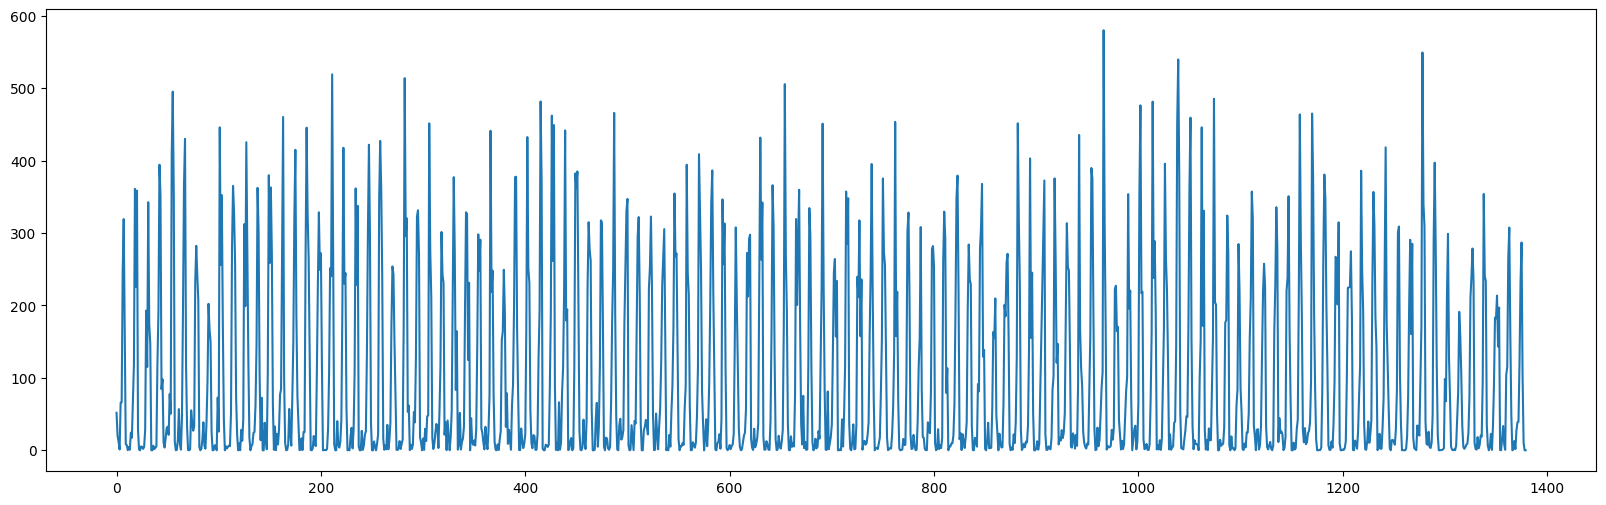

In [ ]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

In [ ]:
# Get the raw data values from the pandas data frame.
data_raw = series.values.astype("float32")

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

# Print a few values.
dataset[0:5]

array([[0.08929496],
       [0.03378728],
       [0.02051371],
       [0.00189622],
       [0.11308396]], dtype=float32)

In [ ]:
# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1104, 276)


In [ ]:
# FIXME: This helper function should be rewritten using numpy's shift function. See below.
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [ ]:
# # Create test and training sets for one-step-ahead regression.
# window_size = 1
# train_X, train_Y = create_dataset(train, window_size)
# test_X, test_Y = create_dataset(test, window_size)
# print("Original training data shape:")
# print(train_X.shape)

# # Reshape the input data into appropriate form for Keras.
# train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
# test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
# print("New training data shape:")
# print(train_X.shape)


# train_size = int(len(dataset) * 0.8)
# train, test = dataset[0:train_size], dataset[train_size:]

In [ ]:

# Fit ARIMA model
def fit_arima_model(train):
    # (p, d, q) values for ARIMA can be adjusted as needed.
    # Here p=5, d=1, q=0 for example
    model = ARIMA(train, order=(5, 1, 0))
    model_fit = model.fit()
    return model_fit

# Fit the ARIMA model
arima_model = fit_arima_model(train)

In [ ]:
# import math
# def predict_and_score(model, X, Y):
#     # Make predictions on the original scale of the data.
#     pred = scaler.inverse_transform(model.predict(X))
#     # Prepare Y data to also be on the original scale for interpretability.
#     orig_data = scaler.inverse_transform([Y])
#     # Calculate RMSE.
#     score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
#     return(score, pred)

# rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
# rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

# print("Training data score: %.2f RMSE" % rmse_train)
# print("Test data score: %.2f RMSE" % rmse_test)
from math import sqrt

def forecast_arima(model_fit, start, end):
    predictions = model_fit.predict(start=start, end=end)
    return predictions

# Forecast values for the test set
start_index = len(train)
end_index = len(train) + len(test) - 1
test_predict = forecast_arima(arima_model, start=start_index, end=end_index)

# Evaluate the model with RMSE, MAE, R²
test_Y = test.flatten()  # Actual test values (directly flatten the numpy array)
rmse_test = sqrt(mean_squared_error(test_Y, test_predict))
mae_test = mean_absolute_error(test_Y, test_predict)
r2_test = r2_score(test_Y, test_predict)

print(f"Test Data: RMSE = {rmse_test:.2f}, MAE = {mae_test:.2f}, R² = {r2_test:.2f}")


Test Data: RMSE = 0.22, MAE = 0.15, R² = -0.11


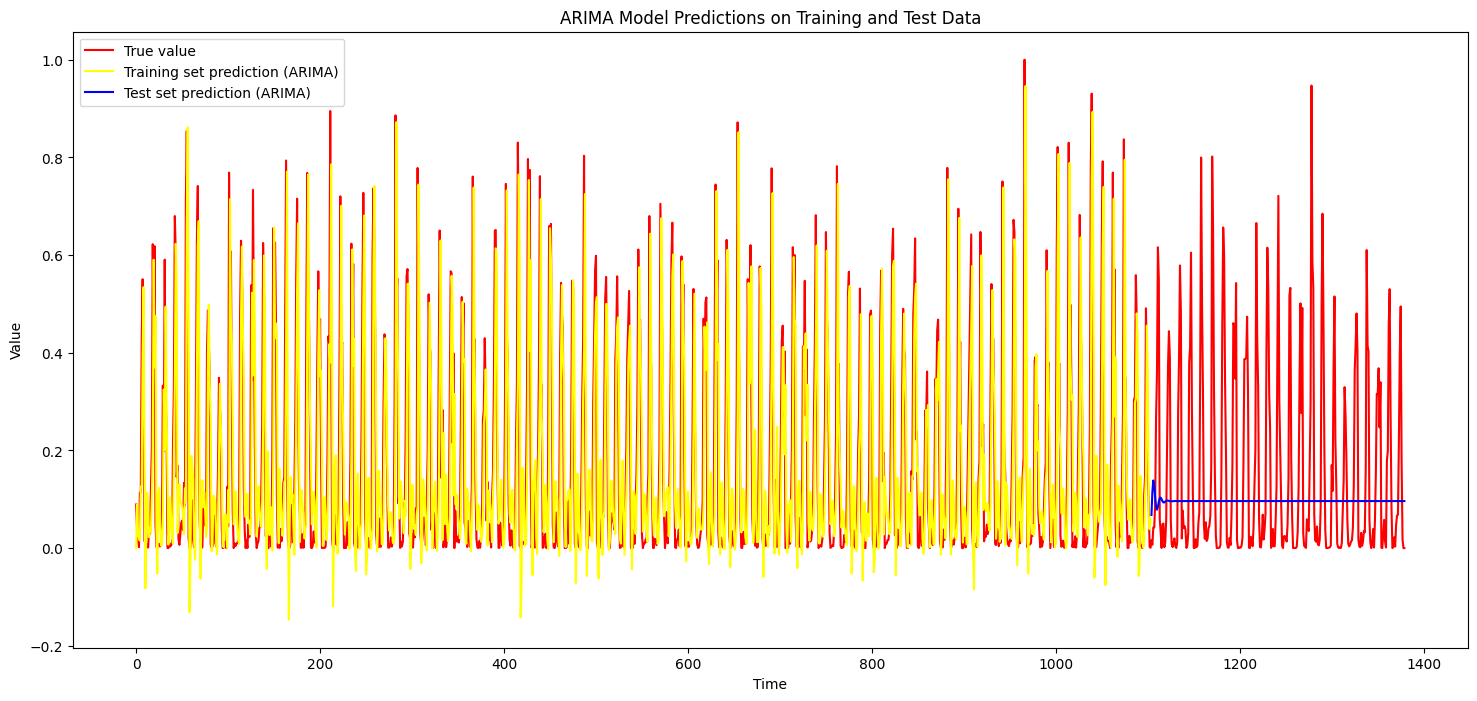

In [ ]:
# # Start with training predictions.
# train_predict_plot = np.empty_like(dataset)
# train_predict_plot[:, :] = np.nan
# train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# # Add test predictions.
# test_predict_plot = np.empty_like(dataset)
# test_predict_plot[:, :] = np.nan
# test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# # Create the plot.
# plt.figure(figsize = (18, 8))
# plt.plot(scaler.inverse_transform(dataset), label = "True value",color='red')
# plt.plot(train_predict_plot, label = "Training set prediction",color='yellow')
# plt.plot(test_predict_plot, label = "Test set prediction")
# plt.xlabel("Months")


# plt.legend()
# plt.show()


# Start with training predictions.
# train_predict_plot = np.empty_like(dataset)
# train_predict_plot[:, :] = np.nan
# train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# # Add test predictions.
# test_predict_plot = np.empty_like(dataset)
# test_predict_plot[:, :] = np.nan
# test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# # Create the plot.
# plt.figure(figsize=(18, 8))
# plt.plot(scaler.inverse_transform(dataset), label="True value", color='red')
# plt.plot(train_predict_plot, label="Training set prediction", color='yellow')
# plt.plot(test_predict_plot, label="Test set prediction")
# plt.xlabel("Months")
# plt.legend()
# plt.show()


# Generate in-sample predictions for the training set
train_predict = arima_model.predict(start=0, end=len(train)-1)  # Predict on training set

# Prepare an empty array for the predictions
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan  # Fill the array with NaN values

# Add training predictions into the array.
train_predict_plot[:len(train_predict), 0] = train_predict  # Add training predictions

# Prepare the test prediction array
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan  # Fill the array with NaN values

# Add test predictions into the array.
test_predict_plot[len(train):len(train) + len(test_predict), 0] = test_predict  # Add test predictions

# Create the plot
plt.figure(figsize=(18, 8))

# Plot the true values from the dataset
plt.plot(dataset, label="True value", color='red')

# Plot the ARIMA model predictions (training set)
plt.plot(train_predict_plot, label="Training set prediction (ARIMA)", color='yellow')

# Plot the ARIMA model predictions (test set)
plt.plot(test_predict_plot, label="Test set prediction (ARIMA)", color='blue')

# Set plot labels and legend
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("ARIMA Model Predictions on Training and Test Data")
plt.legend()

# Show the plot
plt.show()


In [ ]:
test_predict

array([0.06780306, 0.11531637, 0.1385199 , 0.128846  , 0.10419302,
       0.08442401, 0.07863932, 0.0847919 , 0.09513575, 0.10223284,
       0.10334343, 0.10006193, 0.09585933, 0.09343302, 0.0934839 ,
       0.09506241, 0.09671689, 0.0974916 , 0.09727921, 0.09656542,
       0.09593655, 0.09571352, 0.09587057, 0.0961785 , 0.09640867,
       0.09646096, 0.09637214, 0.09624441, 0.09616381, 0.09615801,
       0.09620247, 0.09625361, 0.09628028, 0.09627662, 0.09625596,
       0.09623618, 0.09622805, 0.09623179, 0.0962409 , 0.09624828,
       0.09625043, 0.0962481 , 0.09624425, 0.0962416 , 0.0962412 ,
       0.09624243, 0.096244  , 0.0962449 , 0.09624488, 0.09624429,
       0.09624367, 0.09624338, 0.09624346, 0.09624373, 0.09624396,
       0.09624405, 0.09624399, 0.09624387, 0.09624379, 0.09624377,
       0.0962438 , 0.09624385, 0.09624388, 0.09624388, 0.09624386,
       0.09624385, 0.09624384, 0.09624384, 0.09624384, 0.09624385,
       0.09624385, 0.09624385, 0.09624385, 0.09624385, 0.09624

In [ ]:
train_predict

NameError: name 'train_predict' is not defined

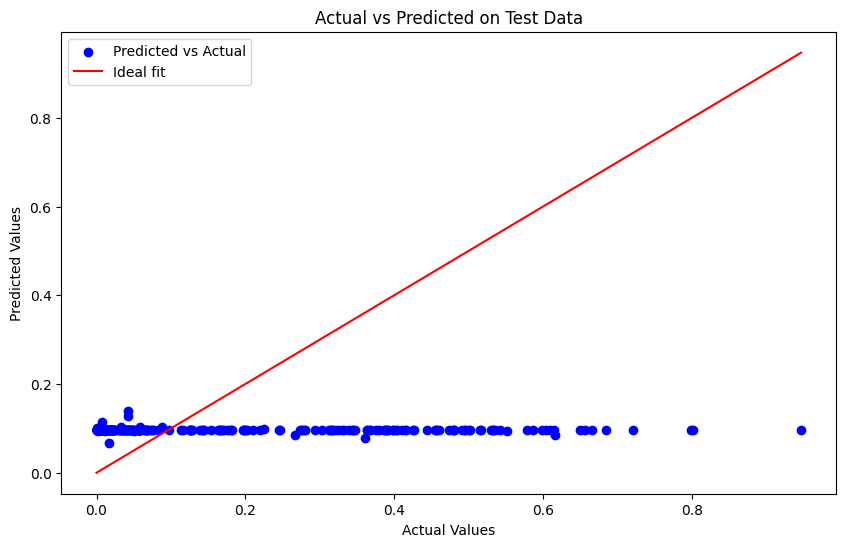

In [ ]:
def plot_actual_vs_predicted(test_Y, test_predict):
    plt.figure(figsize=(10, 6))
    plt.scatter(test_Y, test_predict, color="blue", label="Predicted vs Actual")
    plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], color='red', label="Ideal fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted on Test Data")
    plt.legend()
    plt.show()

plot_actual_vs_predicted(test_Y, test_predict)

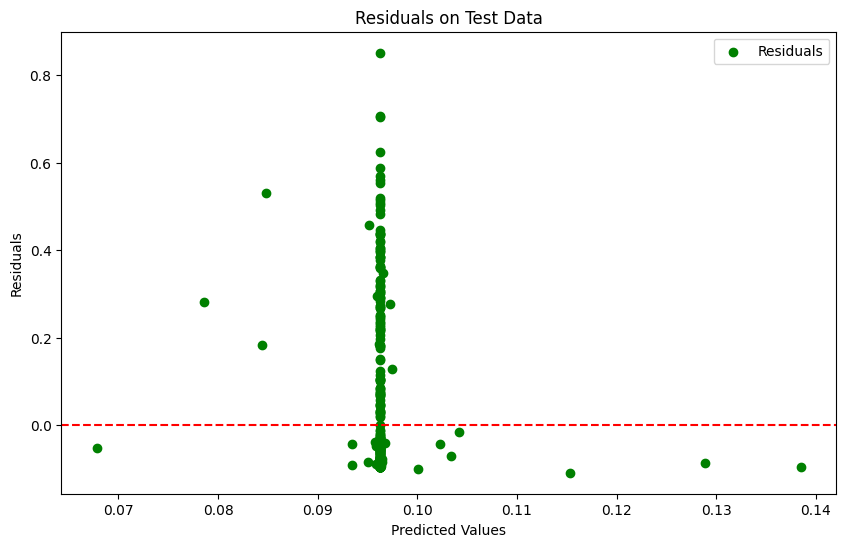

In [ ]:
def plot_residuals(test_Y, test_predict):
    residuals = test_Y - test_predict
    plt.figure(figsize=(10, 6))
    plt.scatter(test_predict, residuals, color='green', label="Residuals")
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals on Test Data")
    plt.legend()
    plt.show()

plot_residuals(test_Y, test_predict)

In [ ]:
def plot_residual_distribution(test_Y, test_predict):
    residuals = test_Y - test_predict
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='purple', bins=20)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Distribution of Residuals on Test Data")
    plt.show()


plot_residual_distribution(test_Y, test_predict)

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
def plot_test_predictions(test_Y, test_predict, dataset):
    plt.figure(figsize=(12, 6))
    plt.plot(dataset, label="True value", color='red')
    plt.plot(range(len(train), len(dataset)), test_predict, label="Test set prediction", color='blue')
    plt.title("Zoomed-in Test Predictions")
    plt.legend()
    plt.show()
plot_test_predictions(scaler, test_Y, test_predict, window_size, dataset)